In [5]:
import os
import csv
import cv2

In [2]:
f=open('label.csv','w')
for name in os.listdir('./label/'):
    a=os.path.splitext(name)[0]
    a=a.split('-')[1]
    f.write(a+'\n')
f.close()

In [54]:
datadir='./rowdata/'
i=[]
for name in os.listdir('./label/'):
    a=os.path.splitext(name)[0]
    i.append(a)

j=0
for name in os.listdir('./rowdata/'):
    os.rename('./rowdata/'+name,'./rowdata/'+i[j]+'.JPG')
    j+=1

IndexError: list index out of range

In [24]:
img = cv2.imread('4529-161.JPG')
print(img.shape)
cropped = img[650:3050,400:2800]
cv2.imwrite('4529-161-cr.JPG',cropped)

(3648, 3648, 3)


True

# 裁剪图片

In [26]:
for name in os.listdir('./valid_row/'):
    img = cv2.imread('./valid_row/'+name)
    cropped = img[650:3050,400:2800]
    cv2.imwrite('./valid/'+name,cropped)

Optimal Values
a: 0.036141582292222356
b: -0.5735680960487426
R^2: 0.5278048667629538
Uncertainty
a: 0.0361+/-0.0035
b: -0.57+/-0.07


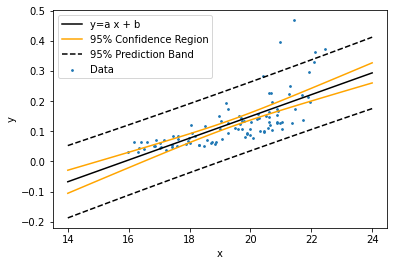

<built-in method astype of numpy.ndarray object at 0x000001BDAB204990>


In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

# import data
url = 'https://apmonitor.com/che263/uploads/Main/stats_data.txt'
data = pd.read_csv(url)
x = data['x'].values
y = data['y'].values
n = len(y)

def f(x, a, b):
    return a * x + b

popt, pcov = curve_fit(f, x, y)

# retrieve parameter values
a = popt[0]
b = popt[1]
print('Optimal Values')
print('a: ' + str(a))
print('b: ' + str(b))

# compute r^2
r2 = 1.0-(sum((y-f(x,a,b))**2)/((n-1.0)*np.var(y,ddof=1)))
print('R^2: ' + str(r2))

# calculate parameter confidence interval
a,b = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))

# plot data
plt.scatter(x, y, s=3, label='Data')

# calculate regression confidence interval
px = np.linspace(14, 24, 100)
py = a*px+b
nom = unp.nominal_values(py)
std = unp.std_devs(py)

def predband(x, xd, yd, p, func, conf=0.95):
    # x = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x, y, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='y=a x + b')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='orange',\
         label='95% Confidence Region')
plt.plot(px, nom + 1.96 * std, c='orange')
# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

# save and show figure
plt.savefig('regression.png')
plt.show()

print(x.astype)